<a href="https://colab.research.google.com/github/DonRoboto/RedesNeuronales/blob/master/ANN_BackProp_1Capa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

In [0]:
def derivada_sigmoide(x):
    return np.multiply(sigmoide(x), (1.0 - sigmoide(x)))

In [0]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

In [0]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

In [0]:
def exactitud(y, y_predicha):
    return (y == y_predicha).mean() * 100

In [0]:
def hacia_adelante(x, W1, b1):
  a1 = x[:, np.newaxis]

  z2 = np.dot(W1.T, a1) + b1
  a2 = sigmoide(z2)  

  y_hat = a2
  
  return z2, a2, y_hat

In [0]:
def retropropagacion(X, y, alpha = 0.01, n_epocas = 100, n_ocultas = 10):
    n_ejemplos = X.shape[0]
    n_entradas = X.shape[1]
    
    # Inicialización de las matrices de pesos W y V
    W1 = np.sqrt(1.0 / n_entradas) * np.random.randn(n_entradas, n_ocultas)
    b1 = np.zeros((n_ocultas, 1))
    
    perdidas = np.zeros((n_epocas))
    exactitudes = np.zeros((n_epocas))
    y_predicha = np.zeros((y.shape))
    for i in range(n_epocas):
        for j in range(n_ejemplos):
            z2, a2, y_hat = hacia_adelante(X[j], W1, b1)

            # cálculo de gradiente para W por retropropagación
            delta = (y_hat - y[j]) * derivada_sigmoide(z2)
            W1 = W1 - alpha * np.outer(a2, delta)
            b1 = b1 - alpha * delta

            y_predicha[j] = y_hat
            
        # calcula error en época
        perdidas[i] = entropia_cruzada_binaria(y, y_predicha)
        exactitudes[i] = exactitud(y, np.round(y_predicha))
        if i%10==0:
          print('Epoch {0}: Error = {1} Exactitud = {2}'.format(i, 
                                                              perdidas[i], 
                                                              exactitudes[i]))

    return W1, b1, perdidas, exactitudes

In [0]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 1, 1]]).T

In [60]:
np.random.seed(0)
W1t, b1t, perdidas, exactitudes = retropropagacion(X, 
                                                 y, 
                                                 alpha = 1.0, 
                                                 n_epocas = 100,
                                                 n_ocultas = 1)

Epoch 0: Error = 1.7737376440972534 Exactitud = 100.0
Epoch 10: Error = 1.546466750888105 Exactitud = 75.0
Epoch 20: Error = 1.4475813771720802 Exactitud = 75.0
Epoch 30: Error = 1.344337358023663 Exactitud = 100.0
Epoch 40: Error = 1.23509500487156 Exactitud = 100.0
Epoch 50: Error = 1.1239866819489883 Exactitud = 100.0
Epoch 60: Error = 1.0157685077521539 Exactitud = 100.0
Epoch 70: Error = 0.9145686343233361 Exactitud = 100.0
Epoch 80: Error = 0.8231279768621282 Exactitud = 100.0
Epoch 90: Error = 0.7426174623375512 Exactitud = 100.0


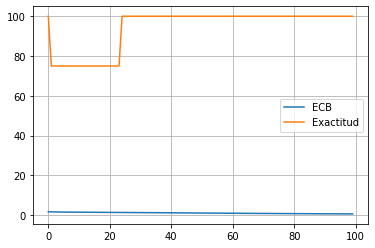

In [61]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
for i in range(4):
  z2, a2, y_hat = hacia_adelante(X[i], W1t, b1t)
  
  if y_hat<0.5:
    y_hat_label = 0
  else:
    y_hat_label = 1  
  
  print(y[i],y_hat_label)

print("****")
print("W=",W1t)
print("b=",b1t)



[0] 0
[1] 1
[1] 1
[1] 1
****
W= [[3.27718617]
 [2.31276667]]
b= [[-0.95953331]]
